<a href="https://colab.research.google.com/github/aaryarao/HousingPriceRegression/blob/main/Kaggle_ML_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Intro & Outline
1. Download the data & import libraries
2. Explore and analyze variables (EDA)
3. Prepare the data for ML training (feature engineering and selection)
4. Train and evaluate different models
5. Tune hyperparameters for the best accuracy
6. Test models with the entire dataset

### Abstract

In this project I utilized the Ames Housing Dataset from Kaggle, compiled by Dean De Cock for use in data science projects. The training dataset contains 80 columns, including the index and target variable: Sale Price. Through data exploration and preprocessing, we selected 7 of the most relevant features and trained multiple models: linear regression, K-nearest neighbors, random forest, ADA boost and bagging. The performance of each model was evaluated using R-squared and root mean squared error (RMSE) metrics. 

Upon completion of model tuning, the random forest and bagging models resulted in R2 scores of 0.97 and 0.983 respectively, indicating that our models accounted for ~97% of variance in the data, while the remaining ~3% may be attributed to inherent randomness or factors not included in the model. The kaggle submission is evaluated upon RMSE and our random forest model received a score of 0.177.

## Importing Data and Libraries


In [1]:
# install required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting drive and authenticating
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Data/train.csv')

from google.colab import auth
auth.authenticate_user()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

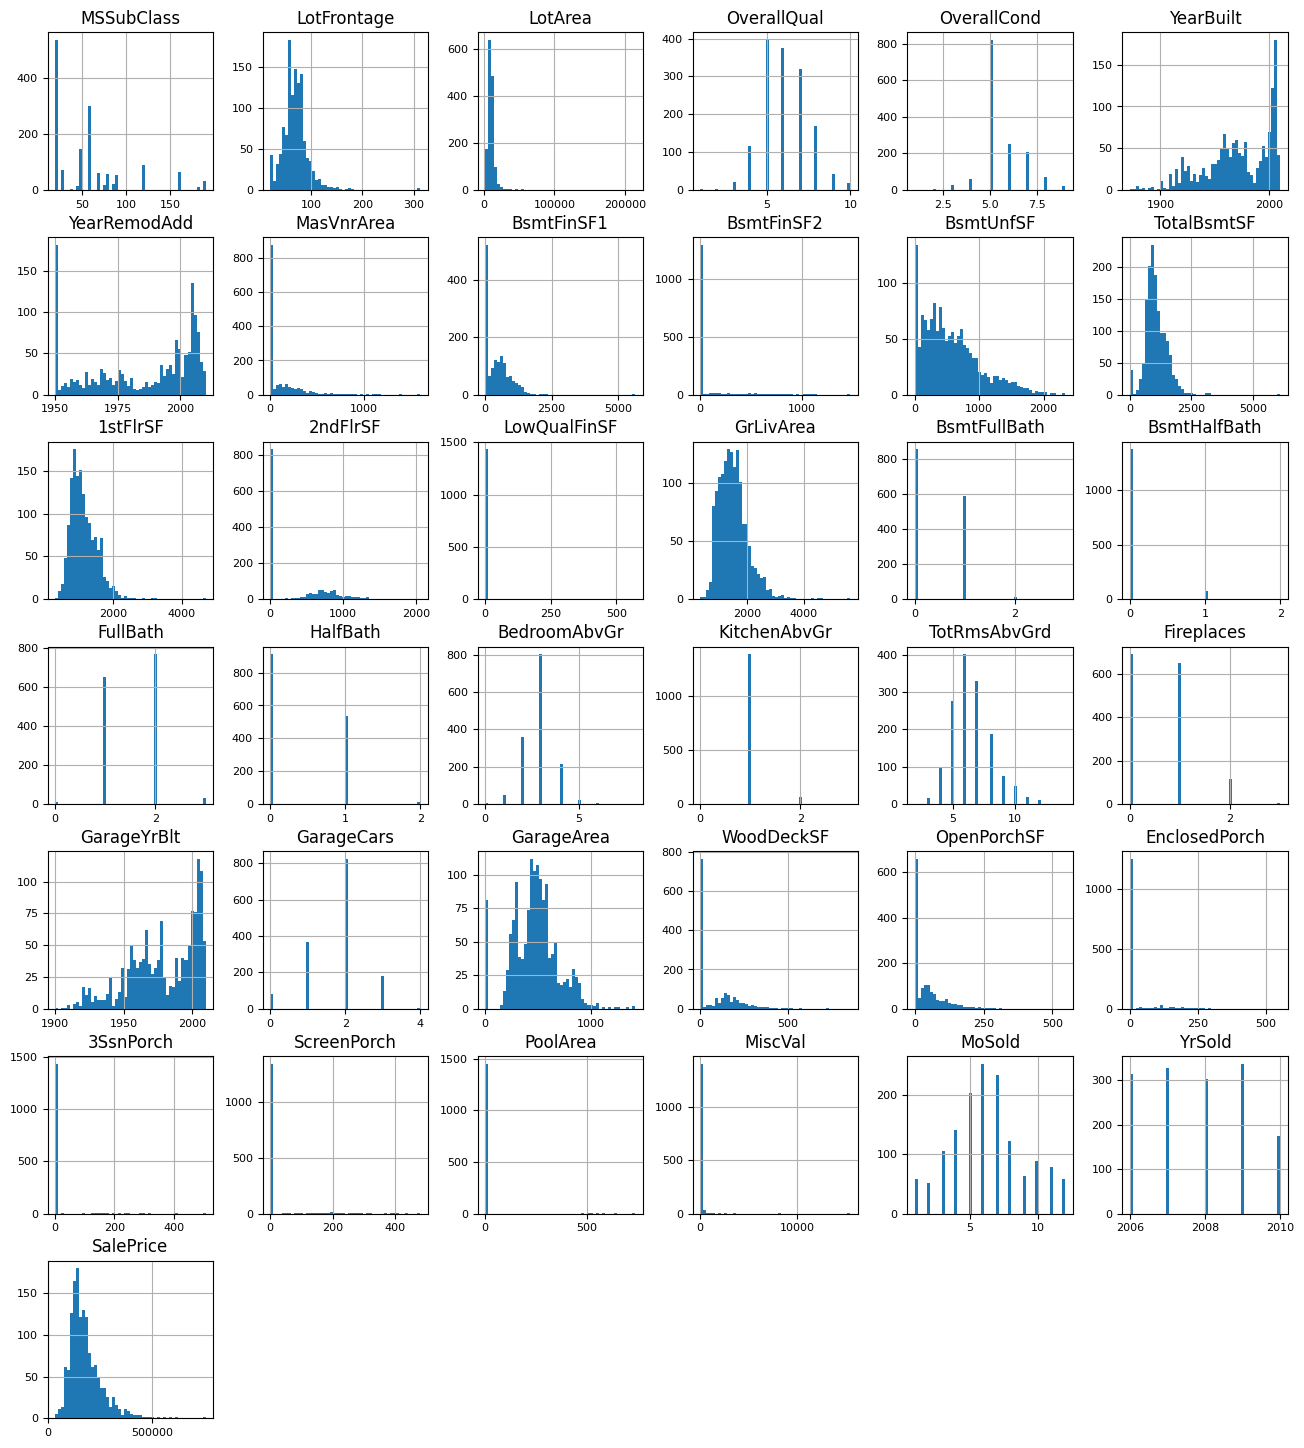

In [5]:
# analyzing distribution of numerical dtypes
df_num = df.drop('Id', axis=1).select_dtypes(include=['float64', 'int64'])
df_num.hist(figsize=(16, 18), bins=50, xlabelsize=8, ylabelsize=8)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


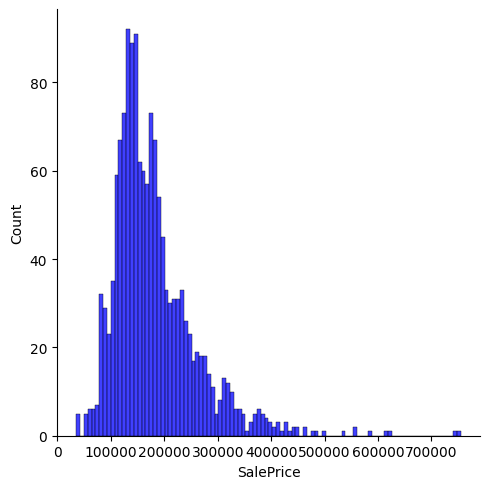

In [7]:
# target variable distribution
print(df['SalePrice'].describe())
sns.displot(df['SalePrice'], color='b', bins=100);

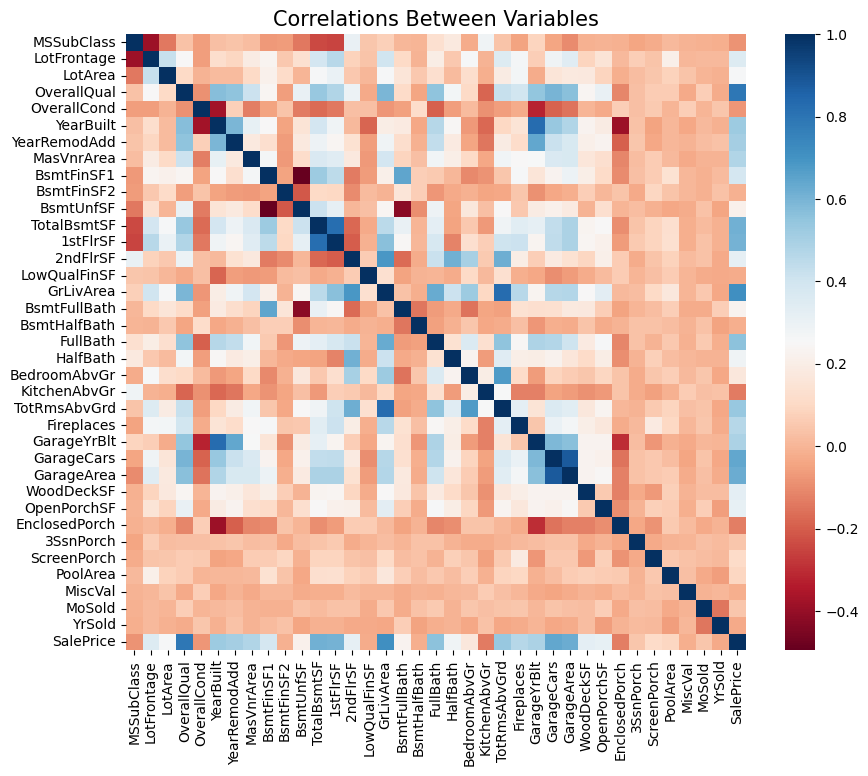

In [6]:
# Correlation map
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

## Data Preparation and Feature Selection

In [8]:
# numerical columns that have <-0.50 or >0.50 correlation with sale price
print(list(df.corr()['SalePrice'][(df.corr()['SalePrice']>0.50) | (df.corr()['SalePrice']<-0.50)].index))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


<ipython-input-8-63ae86077024>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(list(df.corr()['SalePrice'][(df.corr()['SalePrice']>0.50) | (df.corr()['SalePrice']<-0.50)].index))


In [9]:
# feature engineering - creating new numerical cols
df['TotalSF']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['TotalRms']=df['FullBath']+df['HalfBath']+df['BsmtHalfBath']+df['BsmtFullBath']+df['TotRmsAbvGrd']

In [39]:
# feature selection
x= df[['OverallQual','YearBuilt','YearRemodAdd','GrLivArea','GarageArea','GarageCars','TotalSF','TotalRms']]
y= df['SalePrice']

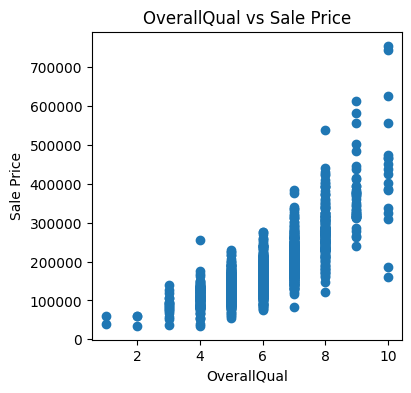

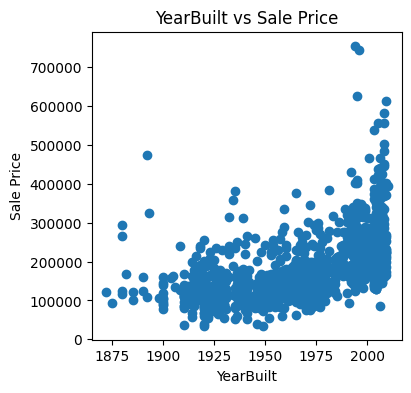

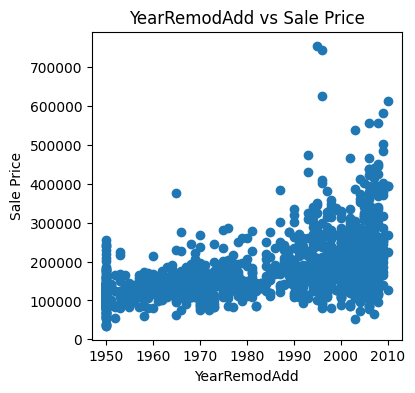

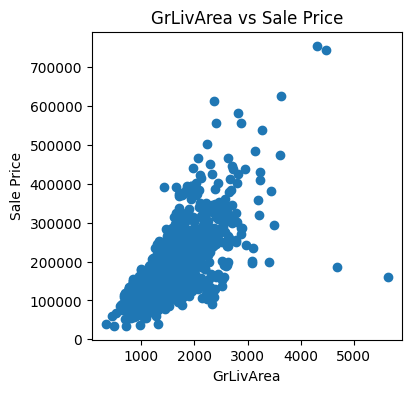

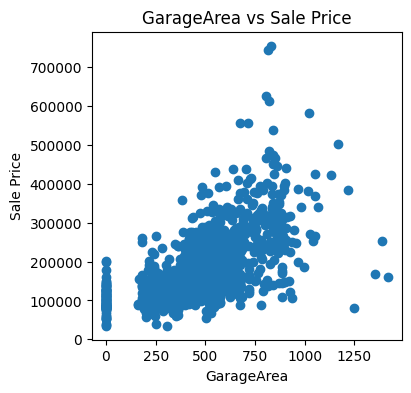

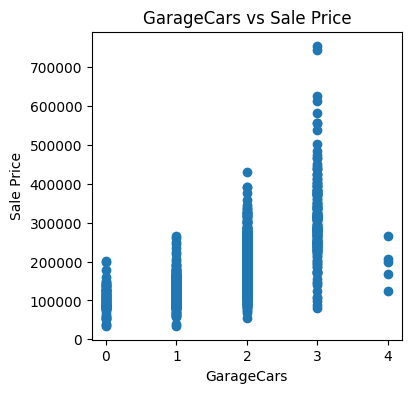

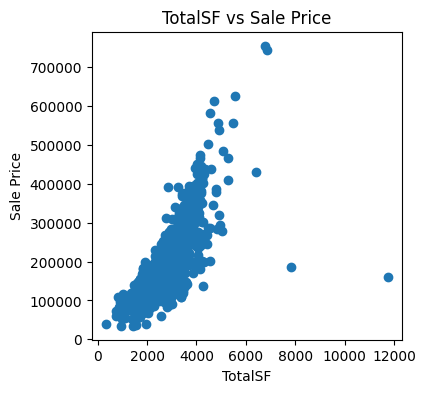

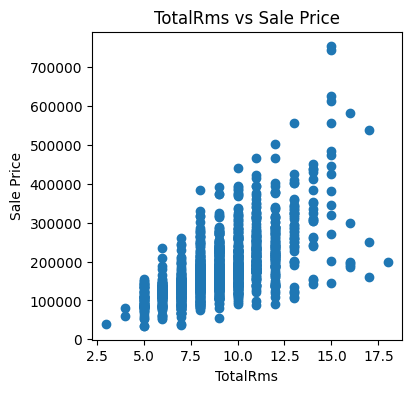

In [40]:
# relationship pattern between selected features and target var

for feature_name in x.columns:
    # Create a scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x[feature_name], y)
    plt.xlabel(feature_name)
    plt.ylabel('Sale Price')
    plt.title(f"{feature_name} vs Sale Price")
    plt.show()

## Model Training

In [41]:
# importing train_test_split
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor

print("Model Accuracies:")

# Linear Model
model1 = LinearRegression().fit(x,y)
model1_scores = cross_val_score(model1, x, y, cv=10)
model1_acc = model1_scores.mean()
print(f'   Linear regression: {round(model1_acc,4)}')

# KNN Model
knn_model = KNeighborsRegressor().fit(x,y)
knn_scores = cross_val_score(knn_model,x,y,cv=10)
knn_acc = knn_scores.mean()
print(f'   K-nearest neighbors: {round(knn_acc,4)}')

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=9, random_state=42).fit(x,y)
rf_scores = cross_val_score(rf_model,x,y,cv=10)
rf_acc = rf_scores.mean()
print(f'   Random forest: {round(rf_acc,4)}')

# ADABoost Model
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42).fit(x,y)
ada_scores = cross_val_score(ada_model,x,y,cv=10)
ada_acc = ada_scores.mean()
print(f'   ADABoost: {round(ada_acc,4)}')

# Bagging Model
bagging_model = BaggingRegressor().fit(x,y)
bagging_scores = cross_val_score(bagging_model,x,y,cv=10)
bagging_acc = bagging_scores.mean()
print(f'   Bagging: {round(bagging_acc,4)}')

Model Accuracies:
   Linear regression: 0.7685
   K-nearest neighbors: 0.7063
   Random forest: 0.84
   ADABoost: 0.7947
   Bagging: 0.8207


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# measuring r2 and root mean sq error for each model

# Linear Model
linear_pred = model1.predict(x_test)
linear_r2_score = r2_score(y_test, linear_pred)
print(f'Linear Model: \n   R2: {round(linear_r2_score,4)} \n   RMSE: {round(np.sqrt(mean_squared_error(y_test,linear_pred)),4)}' )


# KNN Model
knn_pred = knn_model.predict(x_test)
knn_r2_score = r2_score(y_test, knn_pred)
print(f'KNN Model: \n   R2: {round(knn_r2_score,4)} \n   RMSE: {round(np.sqrt(mean_squared_error(y_test,knn_pred)),4)}' )

# Random Forest Model
rf_pred = rf_model.predict(x_test)
rf_r2_score = r2_score(y_test, rf_pred)
print(f'Random Forest Model: \n   R2: {round(rf_r2_score,4)} \n   RMSE: {round(np.sqrt(mean_squared_error(y_test,rf_pred)),4)}' )

# ADABoost Model
ada_pred = ada_model.predict(x_test)
ada_r2_score = r2_score(y_test, ada_pred)
print(f'ADA Boost Model: \n   R2: {round(ada_r2_score,4)} \n   RMSE: {round(np.sqrt(mean_squared_error(y_test,ada_pred)),4)}' )

#Bagging Model
bag_pred = bagging_model.predict(x_test)
bag_r2_score = r2_score(y_test, bag_pred)
print(f'Bagging Model: \n   R2: {round(bag_r2_score,4)} \n   RMSE: {round(np.sqrt(mean_squared_error(y_test,bag_pred)),4)}' )

Linear Model: 
   R2: 0.8043 
   RMSE: 38739.5105
KNN Model: 
   R2: 0.8454 
   RMSE: 34433.2367
Random Forest Model: 
   R2: 0.9701 
   RMSE: 15135.5233
ADA Boost Model: 
   R2: 0.8597 
   RMSE: 32799.4806
Bagging Model: 
   R2: 0.9834 
   RMSE: 11292.777


In [51]:
# Calculate the z-scores for each feature and identify data beyond 3 stdev threshold
def outliers_zscore(x, threshold=3):
    outlier_counts = {}
    for column in x:
       
        z_scores = (x[column] - x[column].mean()) / x[column].std()
        outliers = x.loc[np.abs(z_scores) > threshold]
        
        # Count the number of outliers and add to dict
        num_outliers = len(outliers)
        outlier_counts[column] = num_outliers
    
    # Sort counts in descending order
    sorted_counts = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=False)
    
    return sorted_counts

outlier_list = outliers_zscore(x, threshold=3)
print(outlier_list)

[('YearRemodAdd', 0), ('GarageCars', 0), ('OverallQual', 2), ('YearBuilt', 6), ('GarageArea', 7), ('TotalRms', 10), ('TotalSF', 11), ('GrLivArea', 16)]


## Model Testing

In [45]:
# import test data
df_test = pd.read_csv("/content/drive/MyDrive/Colab Data/test.csv", index_col="Id")

# view data and indexing
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [46]:
# creating total square feet/ total rooms features as done for training data
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['TotalRms'] = (
    df_test['FullBath']
    + df_test['HalfBath']
    + df_test['BsmtHalfBath']
    + df_test['BsmtFullBath']
    + df_test['TotRmsAbvGrd']
)

df_test = df_test[
    ['OverallQual','YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalSF', 'TotalRms']
]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   GrLivArea     1459 non-null   int64  
 4   GarageArea    1458 non-null   float64
 5   GarageCars    1458 non-null   float64
 6   TotalSF       1458 non-null   float64
 7   TotalRms      1457 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 102.6 KB


In [47]:
# imputing mean for missing values in test data frame
from sklearn.impute import SimpleImputer

selected_columns = ['GarageCars', 'GarageArea', 'TotalSF', 'TotalRms']
imputer = SimpleImputer(strategy='mean')
df_test[selected_columns] = imputer.fit_transform(df_test[selected_columns].values)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   GrLivArea     1459 non-null   int64  
 4   GarageArea    1459 non-null   float64
 5   GarageCars    1459 non-null   float64
 6   TotalSF       1459 non-null   float64
 7   TotalRms      1459 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 102.6 KB


<ipython-input-47-6a320392e2e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[selected_columns] = imputer.fit_transform(df_test[selected_columns].values)


In [48]:
rf_test = rf_model.predict(df_test)
len(rf_test)

1459

In [49]:
bag_test = bagging_model.predict(df_test)
len(bag_test)

1459

In [37]:
# saving predictions to housing_results csv
results_rf = pd.DataFrame({"Id": range(1461, 2920), "SalePrice": rf_test})
results_bag = pd.DataFrame({"Id": range(1461, 2920), "SalePrice": bag_test})
results_rf.to_csv("housing_results_rf.csv", index=False)
results_bag.to_csv('housing_results_bag.csv', index=False)

## Steps for Improvement

While we acheived a high R2 score and a submission score of 0.177, there are steps we can take to improve our models:

*   The 'SalePrice' distribution is right skewed with multiple outliars. Our model performance would benefit from normalizing the sale price distribution and performing imputation or removal as necessary for the outliers.

*   There are outliars in many of our selected features: ('OverallQual', 2), ('YearBuilt', 6), ('GarageArea', 7), ('TotalRms', 10), ('TotalSF', 11), ('GrLivArea', 16). To ensure that these values are not negatively influencing our predictions, testing should be performed after treating the missing values.

*   The adaptive boosting model (ADAboost) used for gradient boosting did not result in a strong R2 score, even following model tuning. ADA boost is also sensitive to unneded features; I would like to include XGboost models in testing as they are regularized and less sensitive to overfitting in linear regression models.

